# Exoplanet Transit Interpretation code (EXOTIC)

Instructions for analyzing fits images to create exoplanet light curves within an iPython notebook either through Jupyter or [Google Collab](https://colab.research.google.com/drive/1W1vrgEp9_IjEN16WFxmopLDYvHeYfxpw#scrollTo=1xYSqIvTTQSU)

![](https://github.com/rzellem/EXOTIC/blob/main/Documentation/Images/HAT-P-32bExample.png?raw=true)

Features:
- FITS Image processing
- Aperture Photometry
- Aperture size + Comp Star Optimization
- Transit fitting with nested sampling
- Non-linear limb darkening with multi-filter support (LDTK)
- AAVSO Database Compliant

## 1. Install EXOTIC along with its dependencies 

Run this command before starting a Jupyter server

`pip install exotic`

Download the sample data

In [1]:
!git clone https://github.com/rzellem/EXOTIC_sampledata.git

Cloning into 'EXOTIC_sampledata'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 149 (delta 1), reused 146 (delta 0), pack-reused 0
Receiving objects: 100% (149/149), 23.78 MiB | 11.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.


# Imports 

In [1]:
import bokeh.io
bokeh.io.output_notebook()
from exotic.api.plotting import plot_image
from exotic.exotic import NASAExoplanetArchive, get_wcs, find_target

Loading BokehJS ...

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


# Inspect the first image of a sequence
- Specify the filepath to an image
- Once plotted, red X's indicate saturated stars

In [2]:
plot_image("EXOTIC_sampledata/HatP32Dec202017/HATP-32171220013343.FITS")

SIMPLE: True
BITPIX: 16
NAXIS: 2
NAXIS1: 650
NAXIS2: 500
EQUINOX: 2000.0
FILENAME: HATP-32171220013343.FIT
DATE-OBS: 2017-12-19T18:33:43.317-0700
DATE-END: 2017-12-19T18:34:45.277-0700
LST-OBS: 17:04:23
UT-OBS: 2017-12-20T01:33:43.317-0000
MJD-OBS: 58107.065
OBJECT: HATP-32
EXPTIME: 60.0
RA: 31.312099
HA: 330.06374
DEC: 46.769087
TELALT: 62.592
TELAZ: 47.949
OBS-MODE: Interactive
INSTRUME: Main
CAMPOS: none
FILTER: Clear
CAMFOCUS: 2225
CAMSTAT: Out
IM_SCALE: 5.21
TEL-TRAC: Sidereal
CAMTEMP: 271.0
TELTEMP: 287.0
TELHUM: 5
WEATHER: 99
TELESCOP: Cecilia
LATITUDE: 31.68
LONGITUD: 110.88
OBSERVAT: Whipple Observatory
OBSERVER: moguest
OBSID: moguest-12/19-08:00:11e
COMMENT:   This image was taken automatically. / Mode of image request
CREATOR: MicroObservatory2014-05-23
ORIGIN: Harvard-Smithsonian Center for Astrophysics
REFERENC: http://www.microobservatory.org
CITY: Amado
STATE: AZ
COUNTRY: USA
Image header written to header.json
Saturated Areas: 0
{'value': [], 'x': [], 'y': []}
Saturate

# Identify the target in the field of view

- Use SIMBAD to find an image of the field of view http://simbad.u-strasbg.fr/simbad/

- EXOTIC can also try to find the target using [astronometry.net]() just specify an image and target below

In [4]:
wcsfile = get_wcs("EXOTIC_sampledata/HatP32Dec202017/HATP-32171220013343.FITS")
coord = find_target("HAT-P-32",wcsfile,verbose=True)

Thinking ... DONE!
Simbad: <Table length=1>
  oid           ra                dec        main_id    pmra    pmdec  
               deg                deg                 mas / yr mas / yr
 int64       float64            float64       object  float64  float64 
------- ------------------ ----------------- -------- -------- --------
6140027 31.042823107403756 46.68783621743083 HAT-P-32   -9.825    3.477

Obs Date: 2017-12-19T18:33:43.317
NEW: 31d02m33.9058s 46d41m16.2729s

Target Location: [423.53 286.46]


# Edit the initialization file
Use the cell below to download the default init. file from GitHub

Edit the file with your favorite text editor

In [4]:
!wget https://raw.githubusercontent.com/rzellem/EXOTIC/main/inits.json

--2020-11-11 21:29:31--  https://raw.githubusercontent.com/rzellem/EXOTIC/main/inits.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4349 (4.2K) [text/plain]
Saving to: ‘inits.json’

inits.json          100%[===================>]   4.25K  --.-KB/s    in 0s      

2020-11-11 21:29:32 (37.9 MB/s) - ‘inits.json’ saved [4349/4349]



# Search for a target on the NASA Exoplanet Archive

In [3]:
target = NASAExoplanetArchive("Kepler-25 c")
target.resolve_name()

True

Once the target name is correct, print the plantary parameters and paste them into the inits file

In [4]:
print(target.planet_info(fancy=True))

{
    "Target Star RA": "19:06:33.2137",
    "Target Star Dec": "+39:29:16.4537",
    "Planet Name": "Kepler-25 c",
    "Host Star Name": "Kepler-25",
    "Orbital Period (days)": 12.7207,
    "Orbital Period Uncertainty": 0.00010488088481701516,
    "Published Mid-Transit Time (BJD-UTC)": 2455711.15013,
    "Mid-Transit Time Uncertainty": 0.00014,
    "Ratio of Planet to Stellar Radius (Rp/Rs)": 0.034352583600072935,
    "Ratio of Planet to Stellar Radius (Rp/Rs) Uncertainty": 5.6764289484062556e-05,
    "Ratio of Distance to Stellar Radius (a/Rs)": 23.9,
    "Ratio of Distance to Stellar Radius (a/Rs) Uncertainty": 10.2,
    "Orbital Inclination (deg)": 92.764,
    "Orbital Inclination (deg) Uncertainity": 0.04047221268969613,
    "Orbital Eccentricity (0 if null)": 0.0061,
    "Star Effective Temperature (K)": 6212.0,
    "Star Effective Temperature (+) Uncertainty": 132.8,
    "Star Effective Temperature (-) Uncertainty": -132.8,
    "Star Metallicity ([FE/H])": -0.01,
    "Star Me

# Start EXOTIC
Save your inits file before running!

In [5]:
!exotic -i inits.json

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
>-- Temperature: 6212.0 +/- 132.8
>-- Metallicity: -0.01 +/- 0.1
>-- Surface Gravity: 4.18 +/- 0.09
>-- LD0: 1.2553771240681517 +/- 0.031194824968330787
>-- LD1: -2.2272716424585033 +/- 0.12851969198412552
>-- LD2: 3.209541037622936 +/- 0.16956187622072433
>-- LD3: -1.2376465192325845 +/- 0.07224478312828758
Thinking ... DONE!of 35
21618it [03:02, 118.73it/s, batch: 11 | bound: 74 | nc: 2 | ncall: 73956 | eff(%): 29.231 | loglstar: -23.188 < -16.078 < -16.336 | logz: -23.658 +/-  0.162 | stop:  0.926]          


# Inspect the outputs!


In [9]:
!more /content/EXOTIC_sampledata/FinalParams*.json

{
    "FINAL PLANETARY PARAMETERS": {
        "Mid-Transit Time": "2458107.71367 +/- 0.00092 (BJD)",
        "Ratio of Planet to Stellar Radius": "0.153 +/- 0.003 (Rp/Rs)",
        "Transit depth uncertainty": "0.092 %",
        "Airmass coefficient 1": "7430.33 +/- 23.06",
        "Airmass coefficient 2": "-0.1181 +/- 0.0024",
        "Scatter in the residuals of the lightcurve fit is": "0.57 %"
    }
}


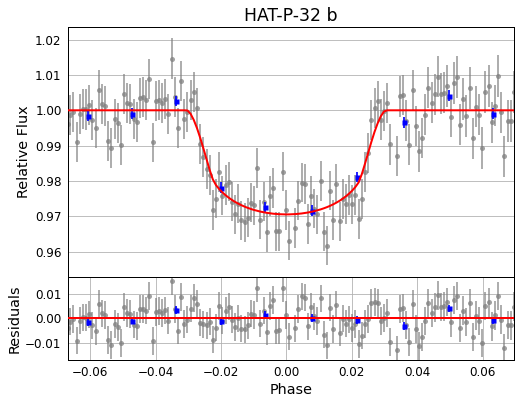

In [10]:
from IPython.display import Image
Image(filename='/content/EXOTIC_sampledata/FinalLightCurve_HAT-P-32 b_December 17, 2017.png')

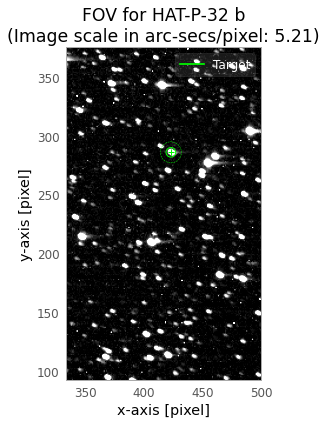

In [11]:
Image(filename="/content/EXOTIC_sampledata/FOV_HAT-P-32 b_December 17, 2017_LinearStretch.png")

## Posteriors
Obtained using nested sampling. The distributions should hopefully be Gaussian otherwise the priors may be off or the data is very nosiy and doesn't allow for a good constraint

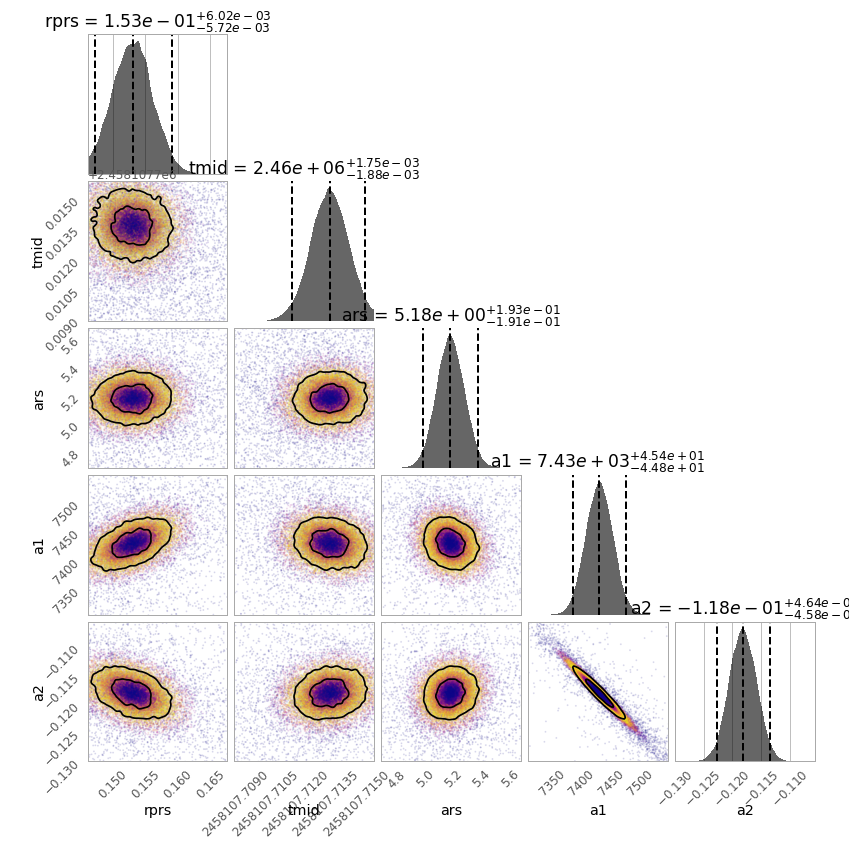

In [12]:
Image(filename='/content/EXOTIC_sampledata/temp/Triangle_HAT-P-32 b_December 17, 2017.png')

# AAVSO
EXOTIC outputs a file that is ready for upload to the [AAVSO Exoplanet Database](https://www.aavso.org/apps/exosite/doc)


In [13]:
!head -n 22 /content/EXOTIC_sampledata/AAVSO*.txt

#TYPE=EXOPLANET
#OBSCODE=RTZ
#SECONDARY_OBSCODE=N/A
#SOFTWARE=EXOTIC v0.25.1.dev21+gf1afa95.d20201111
#DELIM=,
#DATE_TYPE=BJD_TDB
#OBSTYPE=CCD
#STAR_NAME=HAT-P-32
#EXOPLANET_NAME=HAT-P-32 b
#BINNING=1x1
#EXPOSURE_TIME=60.0
#FILTER=V
#NOTES=Weather, seeing was nice.
#DETREND_PARAMETERS=AIRMASS, AIRMASS CORRECTION FUNCTION
#MEASUREMENT_TYPE=Rnflux
#PRIORS=Period=2.1500082 +/- 1.3e-07,a/R*=5.344,inc=88.98,ecc=0.159,u0=1.8838407021829355 +/- 0.04574425230840874,u1=-3.3263928378857783 +/- 0.18482417675150628,u2=3.9229264818959098 +/- 0.24077174860802045,u3=-1.480374346193067 +/- 0.10168398066416451
#RESULTS=Tc=2458107.71367107 +/- 0.00092104,Rp/R*=0.153015 +/- 0.003018,Am1=7430.32872 +/- 23.05624,Am2=-0.11814 +/- 0.00237
#DATE,FLUX,MERR,DETREND_1,DETREND_2
2458107.56985747,6479.1679569,36.8310428,1.1264418,6504.5043942
2458107.57158292,6498.7704856,36.8867164,1.122456,6507.5679129
2458107.57366676,6508.8382879,36.9152775,1.1178092,6511.1413085
2458107.57574893,6456.185994,36.7656639,1.11333